The first part to be done in this project is the conversion of provided R Code into Python format. The code was provided by my supervisor and it had to be analysed and rewritten using Python modules, pandas, and functions. The first section deals with the modules added to replicate the R packages

In [2]:
#library(R.matlab) is run as [from scipy.io import loadmat]
#library(hyperSpec) done through hyperspy and spectral modules
#library(ChemometricsWithR) is obtained through scipy modules and scikit-learn. 
#library(baseline) is part of scipy module
#library(ggplot2) is part of plotnine module
#library(pls) is part of sklearn module

import pandas as pd
import numpy as np
import peakutils
from scipy.io import loadmat
from scipy import signal, misc #Replaces signal library
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from BaselineRemoval import BaselineRemoval
from peakutils import baseline 
import math
from sklearn.preprocessing import normalize #PCA in sklearn
from sklearn import preprocessing

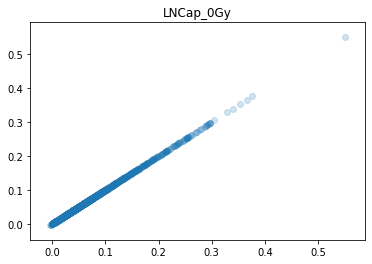

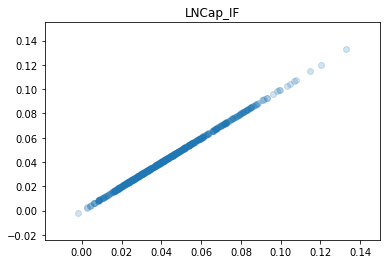

In [3]:
#Loading wavenumber data
wavenumber = loadmat("wavenumber.mat")
wavenumber = wavenumber['wavenumber']

#LNCaP
data = loadmat("LNCaP_0Gy.mat") #This loads the matlab file into the workspace as a 'list' object
LNCaP_0Gy = data['data'] #Extracting the LNCaP spectral data matrix from R Code
plt.scatter(LNCaP_0Gy[:, 0], LNCaP_0Gy[:, 0], alpha=0.2)
plt.title('LNCap_0Gy')
plt.show()

data = loadmat("LNCaP_IF.mat") #This loads the matlab file into the workspace as a 'list' object
LNCaP_IF = data['data'] 
plt.scatter(LNCaP_IF[:, 0], LNCaP_IF[:, 0], alpha=0.2)
plt.title('LNCap_IF')
plt.show()

After loading the main modules, we follow with the loading of the provided Mat format data. This requires converting the files into lists and setting named variables of the files to the array. The data can also be converted back into a matlab file once we are done with the arrays. 

In [4]:
#SG Filtering
numrow = LNCaP_0Gy.shape[0] # Shape functions as nrow and ncol but specificed to the array elements
numcol = LNCaP_0Gy.shape[1]
vec1= [] # creates empty list
vec1 = ["LNCaP 0GY"]*(numrow) #Simplified version of applying name to each row


filtLNCaP_0Gy = np.asmatrix(LNCaP_0Gy) # Should work in creating similar matrix

from scipy.signal import savgol_filter

for i,n in enumerate (LNCaP_0Gy[0]): #Removed {} and got sg filter from python, ordering is n,p,m versus p,n,m / for i, n in enumerate (LCAaP_0Gy[0]):
  filtLNCaP_0Gy == savgol_filter(LNCaP_0Gy, 13, 5, 0)

Savitzky–Golay Filtering is applied to the data abvoe, however difficulty is experienced trying to covert the idea of setting the vector to a null object, likely one of the functions is not correct for the type of vector data used. Once I reevaluated what this section was attemping in R code, I realised there was a similar method to add the data set name to the rows

The for loop was made to be work better using enumerate, which let the data be filtered without going outside the array dimensions.

In [5]:
#Baseline Correction Method 1
#filtLNCaP_0Gy = filtLNCaP_0Gy[0:10, 0:10]
#scaler = MinMaxScaler(feature_range=(-1, 1))
#filtLNCaP_0Gy = scaler.fit_transform(filtLNCaP_0Gy.reshape(-1, 1))
#LNCaP_0Gy = BaselineRemoval(filtLNCaP_0Gy[0], 1626)
#LNCaP_0Gy_corrected = LNCaP_0Gy.IModPoly()
#LNCaP_0Gy_corrected.type

#for array in np.asarray(filtLNCaP_0Gy):
  #LNCaP_0Gy = BaselineRemoval(array, 1626)
  #LNCaP_0Gy_corrected = LNCaP_0Gy.IModPoly()
  #LNCaP_0Gy_corrected.type
    # Takes unknown amount of time to execute (8 hours running did not reach end of execution of code)

#Baseline Correction Method 2
#LNCaP_0Gy = peakutils.baseline(filtLNCaP_0Gy) 
  #Creates error 'shapes (4,2738184) and (1684,1626) not aligned: 2738184 (dim 1) != 1684 (dim 0)'


#Baseline Correction Method 3
#from scipy import sparse
#from scipy.sparse.linalg import spsolve  
  
#def baseline_als(y, lam, p, niter=10):
  #L = len(y)
  #D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
  #w = np.ones(L)
  #for i in range(niter):
    #W = sparse.spdiags(w, 0, L, L)
    #Z = W + lam * D.dot(D.transpose())
    #z = spsolve(Z, w*y)
    #w = p * (y > z) + (1-p) * (y < z)
  #return z

#LNCaP_0Gy = baseline_als(filtLNCaP_0Gy, 2, 5)
  # Creates error 'matrix - rhs dimension mismatch ((1684, 1684) - 1)'
  

Several baseline methods were tested, however none have been able to work so far. There may be an issue based in trying to copy the R code to closely, creating an array that python Baseline functions / methods cannot process. Looking back on the array data to find an issue may be able to get the baseline correction functions to work, however this understanding of the array form will require research as to why the original methods were used

Currently, Baseline correction has not been able to work with two methods attempted. The issue arrives as there is no Python equivalent to the baseline package in R, which uses 4S Peak Filling – baseline estimation by iterative mean suppression, a paper of which can be found at [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4487348/] however the algorithm is not provided besides the R package that is the basis of the baseline function used in the R code.

The savgol filter hasnt been confirmed if it functions as the R code does, but the code that does work appears to run identical (not working code is given ##)

In [6]:
#SG Filtering for LNCAP_IF
numrow1 = LNCaP_IF.shape[0]
numcol1 = LNCaP_IF.shape[1]
vec2= []
vec2 = ["LNCaP 2GY"]*(numrow1)

filtLNCaP_IF = np.asmatrix(LNCaP_IF)

for i in range(1,numrow1):
    
  filtLNCaP_IF[i,] == savgol_filter(LNCaP_IF[i,],13, 5, 0)


In [7]:
ID = np.concatenate((vec1, vec2), axis=None).astype(str) #ID = as.character(c(vec1,vec2)), axis must be set to None to create singe dimension vector, then it is set as string type

#NORMALIZE spectra (vector normalization)
LNCaP_0Gy = preprocessing.normalize(LNCaP_0Gy) # Using sklearn normalizing, does not create same results as sweep function
LNCaP_IF = preprocessing.normalize(LNCaP_IF)

dataall = np.concatenate([LNCaP_0Gy,LNCaP_IF])

Concatenating vec1 and vec2 into a string vector was succesful, and similarly done with LNCaP_0Gy and LNCap_IF for datall. The Spectra Normalization was running but when tested, the values did not correpond to the same point as on the R code, even when compensating and not running the baseline code. 

Trying to fix it led to issues with the array being out of bounds ("index 1626 is out of bounds for axis 0 with size 1626"). This code was instead replaced with sklearn normalize, however it doesnt normalize like the R code sweep function, so this may be adjusted in future.

The main issue was as with the baseline package, there was no equivalent form of the sweep function in Python. The code used was based on similar attempts, posted online, of replicating the function in Python

original shape:    (2354, 1626)
transformed shape: (2354, 4)


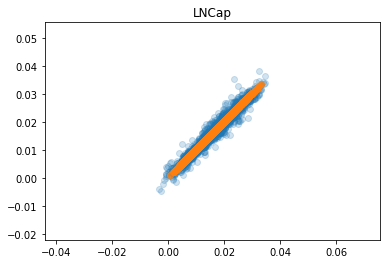

In [8]:
#PCA
from sklearn.decomposition import PCA
# Create a PCA instance: pca
pca = PCA(0.9)
pca.fit(dataall)
X_pca = pca.transform(dataall)
print("original shape:   ", dataall.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(dataall[:, 0], dataall[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.title('LNCap')
plt.axis('equal');
plt.show()
#plt.savefig('Dataset 1 & 2.png')


PCA analysis was performed on the concated datasets, and 90% of the variance was kept. The data was then plotted on a scatter plot comparing before and after PCA

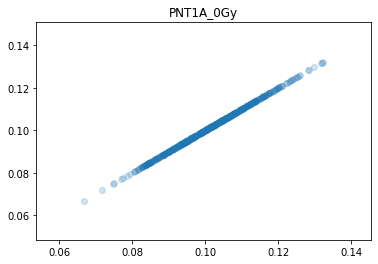

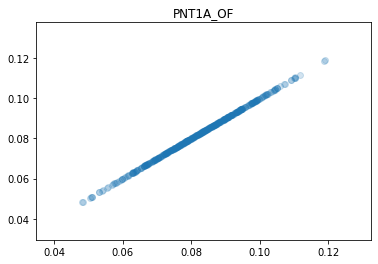

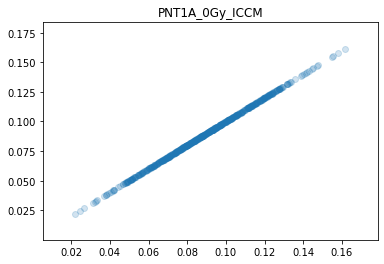

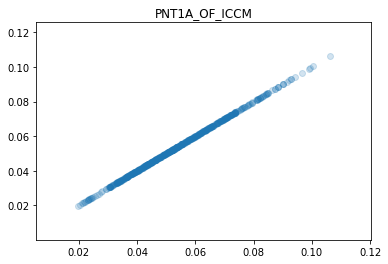

In [11]:
#PNT1A

###################First two data sets
data = loadmat("PNT1A_0Gy.mat") #This loads the matlab file into the workspace as a 'list' object
PNT1A_0Gy = data['data']  #Extracting the PNT1A PNT1A.0Gytral data matrix
plt.scatter(PNT1A_0Gy[:, 0], PNT1A_0Gy[:, 0], alpha=0.2)
plt.title('PNT1A_0Gy')
plt.show()

data = loadmat("PNT1A_OF.mat") #This loads the matlab file into the workspace as a 'list' object
PNT1A_OF = data['data'] 
plt.scatter(PNT1A_OF[:, 0], PNT1A_OF[:, 0], alpha=0.2)
plt.title('PNT1A_OF')
plt.show()

#SG Filtering 
numrow = PNT1A_0Gy.shape[0]
numcol = PNT1A_0Gy.shape[1]

filtPNT1A_0Gy = np.asmatrix(PNT1A_0Gy)

for i, n in enumerate (PNT1A_0Gy[0]):
    
  filtPNT1A_0Gy == savgol_filter(PNT1A_0Gy,13, 5, 0)

#Baseline Correction / basline.fill peaks method 4s Peaks method

#SG Filtering 
numrow1 = PNT1A_OF.shape[0]
numcol1 = PNT1A_OF.shape[1]

filtPNT1A_OF = np.asmatrix(PNT1A_OF)

for i, n in enumerate (PNT1A_OF[0]):
    
  filtPNT1A_OF == savgol_filter(PNT1A_OF,13, 5, 0)

#Baseline Correction

#NORMALIZE spectra (vector normalization)
PNT1A_0Gy = preprocessing.normalize(PNT1A_0Gy)
PNT1A_OF = preprocessing.normalize(PNT1A_OF)

#######################Second two data sets
data = loadmat("PNT1A_0Gy_ICCM.mat") #This loads the matlab file into the workspace as a 'list' object
PNT1A_0Gy_ICCM = data['data']  #Extracting the spectral data matrix
plt.scatter(PNT1A_0Gy_ICCM[:, 0], PNT1A_0Gy_ICCM[:, 0], alpha=0.2)
plt.title('PNT1A_0Gy_ICCM')
plt.show()

data = loadmat("PNT1A_OF_ICCM.mat") #This loads the matlab file into the workspace as a 'list' object
PNT1A_OF_ICCM = data['data'] 
plt.scatter(PNT1A_OF_ICCM[:, 0], PNT1A_OF_ICCM[:, 0], alpha=0.2)
plt.title('PNT1A_OF_ICCM')
plt.show()

#SG Filtering
numrow = PNT1A_0Gy_ICCM.shape[0]
numcol = PNT1A_0Gy_ICCM.shape[1]

filtPNT1A_0Gy_ICCM = np.asmatrix(PNT1A_0Gy_ICCM)


for i, n in enumerate (PNT1A_0Gy_ICCM[0]):
    
  filtPNT1A_0Gy_ICCM == savgol_filter(PNT1A_0Gy_ICCM,13, 5, 0)

#Baseline Correction

#SG Filtering
numrow1 = PNT1A_OF_ICCM.shape[0]
numcol1 = PNT1A_OF_ICCM.shape[1]

filtPNT1A_OF_ICCM = np.asmatrix(PNT1A_OF_ICCM)

for i, n in enumerate (PNT1A_OF_ICCM[0]):
    
  filtPNT1A_OF_ICCM == savgol_filter(PNT1A_OF_ICCM,13, 5, 0)


#Baseline Correction 

#NORMALIZE spectra (vector normalization)
PNT1A_0Gy_ICCM = preprocessing.normalize(PNT1A_0Gy_ICCM)
PNT1A_OF_ICCM = preprocessing.normalize(PNT1A_OF_ICCM)
  


This section is similar to the previous sections, simply using new datasets. Normalization was followed as previous, and baseline still has not been figured out. 

Original shape:    (2253, 1626)
Transformed shape: (2253, 2)


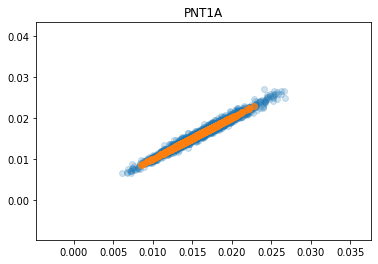

In [12]:
#FOUR WAY PCA PNT1A in each of 4 classes 
numrow = PNT1A_0Gy.shape[0]
vec1 = []
vec1 = ["PNT1A 0Gy"]*(numrow)

numrow2 = PNT1A_0Gy_ICCM.shape[0]
vec2 = []
vec2 = ["PNT1A 0Gy + ICCM"]*(numrow2)

numrow3 = PNT1A_OF.shape[0]
vec3 = []
vec3 = ["PNT1A OF"]*(numrow3)

numrow4 = PNT1A_OF_ICCM.shape[0]
vec4 = []
vec4 = ["PNT1A OF + ICCM"]*(numrow4)


dataall = np.concatenate([PNT1A_0Gy,PNT1A_0Gy_ICCM,PNT1A_OF,PNT1A_OF_ICCM])
ID = np.concatenate((vec1, vec2, vec3, vec4), axis=None).astype(str)

#PCA 
pca = PCA(0.9)
pca.fit(dataall)
Y_pca = pca.transform(dataall)
print("Original shape:   ", dataall.shape)
print("Transformed shape:", Y_pca.shape)

Y_new = pca.inverse_transform(Y_pca)
plt.scatter(dataall[:, 0], dataall[:, 1], alpha=0.2)
plt.scatter(Y_new[:, 0], Y_new[:, 1], alpha=0.8)
plt.title('PNT1A')
plt.show()

Again, similar issues as with the above sections. The plotting methods havent been converted, the focus being on Baseline Correction